In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
edw = ctrl.Antecedent(np.arange(0, 120001, 1), 'Daylight')
alt = ctrl.Antecedent(np.arange(-.1, 91, 1), 'Solar altitude')
alpha = ctrl.Consequent(np.arange(0, 1.1, .1), 'Blind Position')

# Auto-membership function population is possible with .automf(3, 5, or 7)

edw['l']=fuzz.trapmf(edw.universe, [0, 0, 10000, 20000])
edw['h']=fuzz.trapmf(edw.universe, [10000, 20000, 50000, 50000])
edw['vh']=fuzz.trapmf(edw.universe, [50000, 100000, 120000, 120000])

alt['l']=fuzz.trimf(alt.universe, [0, 15, 30])
alt['m']=fuzz.trimf(alt.universe, [15, 30, 60])
alt['h']=fuzz.trimf(alt.universe, [30, 60, 90])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
alpha['vl'] = fuzz.trimf(alpha.universe, [0, 0, 0])
alpha['l'] = fuzz.trimf(alpha.universe, [0, 0.2, 0.4])
alpha['m'] = fuzz.trimf(alpha.universe, [0.2, 0.4, 0.6])
alpha['h'] = fuzz.trimf(alpha.universe, [0.4, 0.7, 1])
alpha['vh'] = fuzz.trimf(alpha.universe, [1, 1, 1])

C:\Users\manut\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


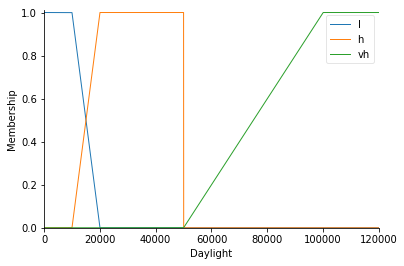

In [2]:
edw.view()

C:\Users\manut\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


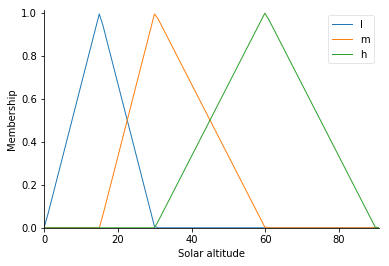

In [3]:
alt.view()

C:\Users\manut\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


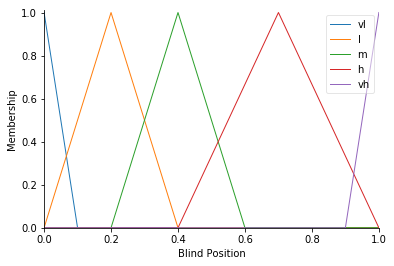

In [4]:
alpha.view()

(<matplotlib.figure.Figure at 0x22d215d1898>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22d215d98d0>)

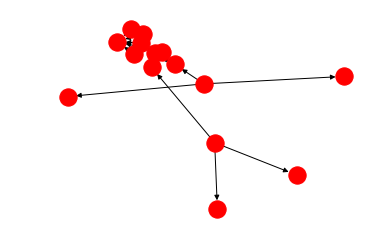

In [5]:
rule1 = ctrl.Rule(edw['l'] & alt['l'], alpha['vh'])
rule2 = ctrl.Rule(edw['h'] & alt['l'], alpha['l'])
rule3 = ctrl.Rule(edw['vh'] & alt['l'], alpha['vl'])
rule4 = ctrl.Rule(edw['l'] & alt['m'], alpha['vh'])
rule5 = ctrl.Rule(edw['h'] & alt['m'], alpha['m'])
rule6 = ctrl.Rule(edw['vh'] & alt['m'], alpha['vl'])
rule7 = ctrl.Rule(edw['l'] & alt['h'], alpha['vh'])
rule8 = ctrl.Rule(edw['h'] & alt['h'], alpha['h'])
rule9 = ctrl.Rule(edw['vh'] & alt['h'], alpha['vl'])

rule3.view()

In [6]:
blind_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

In [7]:
blind = ctrl.ControlSystemSimulation(blind_ctrl)

In [12]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
blind.input['Daylight'] = 46800
blind.input['Solar altitude'] = 65

# Crunch the numbers
blind.compute()

0.6999999999999998


C:\Users\manut\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


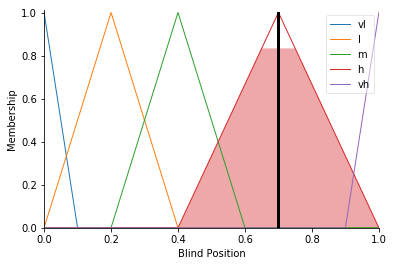

In [13]:
print (blind.output['Blind Position'])
alpha.view(sim=blind)